# 우리가 사용하는 time series data = synthetic seasonal data

# Time Series 이란? 

시간에 따라서 값이 변하는 데이터를 시계열 데이터라고 부르는 것이다. 

그래프에 만약에 하나만 있을 경우에는 그냥 single variant 라고 하게 되는데, 만약에 데이터가

많은 경우에는 multivariant 이라는 표현을 사용하는 것 같다. 

 # 우리가 ML 을 이용해서 Time Series 데이터로 뭘하게 될 것인가? 

1. Forecast ( 앞으로의 데이터가 어떻게 될 것인지에 대해서 예측을 하는 것을 하게 되는 것이지뭐) 

2. Imputation - Back into the past ( 우리가 어떻게 해서 지금의 데이터를 얻게 되었는지 예측을 하는 것) 비어있는 데이터를 채워 넣을 수도 있는 것이다. 

3. can predict anomalies. (변칙적인 것을 갖고 학습을 시키게 되면 추후에도 어디에서 변칙적이게되는 지 예측할 수 있게 된다는 것을 의미... )

 
 # Common Patterns in Time Series


## 1. Trend
우상향, 우하향 이런 것을 의미한다고 생각하면 될거 같음. 

## 2. Seasonality
주기를 갖고 있는거 

## 3. hard to predict
noise 가 많아서 예측하기가 엄청 힘들어 보이는 것

## 4. no-trend, no-seasonality
뭔가 트랜드가 있는듯, 규칙성이 있는듯 없는 듯 하는 패턴

### 앞은 식으로도 표현이 가능 + occasional spike 

## 5. Trend + season + autocorrelation + noise
#### autocorrelation : Data that follows a predictable shape, even if the scale is different



그래서 ML 을 통해서 pattern 을 찾고, prediction 을 진행하게 될 것이다. 

실제로는 뭔가 뚜력한 패턴이 없을수도 있고, 뭔가 big event 가 있을수도 있다. 예를들면 Stock 과 같은 것들. 


# Generating Sequence 에 대한 영상 -> 별로 중요하지 않다고 개인적으로 생각을 한다. 


# Trend-Seasonality 에 Noise 넣은것을 이용해서 Train, Validation, Test set 구분하기! 

## Fixed Partitioning 이라고 부른다. 

**Fixed Partitioning 이라는 것은, 먼저 데이터의 전반적인 패턴이 반영될 수 있도록 한 시즌을 일정하게 training period 에 담는 방식**

노이즈랑 트랜드랑 시즌이 있는 시계열 그래프에서 초반은 training, 중간은 validation, 마지막은 Test 이렇게 나누는 것이 가능하다. 

validation 을 evaluate 할때 사용하긴하는데, 이 또한 trianing 에 넣는 것이 있다고 한다. 그리고 나서 test period 의 값을 내는지 못 내는지 

확인하는 방법이 있다고 한다. 

### test period 는 미래를 예측하는데 상당히 중요한 것이다. 제일 가깝게 있기 때문. 그래서 test period 도 같이 마지막에 같이 train 시키는 경우도 있다고 한다. 
 
 이러한 이유 때문에 주어진 그래프에서 validation 을 그래프의 제일 마지막에 있는 부분으로 설정을 하고 test 는 미래에 있는 것을 사용한다고 한다. 
 
 #### 그렇게 되면.. test 를 어떻게 쓴다는 것인지 이해를 하지 못했다. 설명이 약간 필요한거같은데... 

## Fixed Partitioning 이라는 것은 엄청 intuitive 하고 simple 한 방법이다. 그러나 다른 방법도 있다. 

## Roll-Forward Partitioning

**Roll-forward partitioning 이라는 것은, 짧은 훈련기간에서부터 시작해서, 점차 적으로 그 기간을 늘려나가는 방식. 하루/일주일/한달을 학습한 후 그 이후의 기간을 예측하는 방식**


# Metrics for. valuating performance (성능을 예측하는데 사용하는 행렬) 

https://velog.io/@tyhlife/머신러닝-회귀-모델의-평가-지표

- error = forecasts - actual : 예측한 값 - 실제 값
- mse = np.square(errors).mean() : 에러에 제곱을 함으로써 에러값의 음수를 없애기 위해서 존재
- rmse = np.sqrt(mse): 기존의 에러값들과 비슷한 scale 을 갖게 하기 위해서는 루트를 mse 에 씌우게 되는 것 

ex) 기온을 예측하는 모델의 RMSE 가 3 이라면, 이 모델은 평균적으로 3도 정도를 잘못 예측하는 것임

- mae = np.abs(errors).mean() : 에러의 절댓값에 대한 평균. 직관적이지만, 실제 값에 대해서 

- mape = np.abs(errors/x_valid).mean() : 에러 값을 % 를 통해서 표현하는 것. 에러를 표현하는 것에 굉장히 용이 하지만, 실제값에 대해서 underestimate 인지, overestimate 인지 파악하는 것이 어렵다고 한다. 

mse 를 mae 대신에 사용하는 경우는, 에러가 작을때. 왜냐하면 제곱을 해야되는 것이기 때문에  


# moving average and differencing

average 를 땀으로써, trend 나 seasonality 를 볼수는 없다. 하지만 noise 를 없애는데에는 상당히 좋다고 한다. 

예측을 하고자 하는 시점에 따라서 naive forecast 보다 더 안좋은 결과값을 내는 경우도 있다. 

## moving average and differencing  적용하기 

위에있는 문제를 해결하는 방법으로는, trend 를 없애는 것이다. 그렇게 되면 seaonsality 만 보게 되는 것이지. 

그래서 여기에서는 time series 그 자체를 공부 하는 것보다는, series(t) - series(t-365) 를 해서 t 초 와 ㅅ-365 초 에 해당하는 데이터 값을 비교 하게 되는 것이다. 

값의 차이를 보는 것이지. 

여기에 moving average 를 하게 될 수 도 있다고 한다. 결론적으로 예측을 할때는 +365 를 하면 된다는 식으로 말을 하는 것 같은데 정확하게 이해하지 못했다. 이렇게 하면 원래 데이터에 대해서의 뭔가를 얻을수 있다고 하는데 .. 

Forecasts = moving average differenced series + series(t-365) 라고 한다. 

**그래도 noise 는 유지 된다고 한다. 왜? +series 를 하기 때문이라고 한다. **

해결책은 뭐냐 ? 


removing past noise 를 한다 by using moving average on past series. 

이렇게 하게 되면 좀 더 msqe 가 낮아 진다고 한다. 상당히 완벽하게 된 자료라고 한다. 



# Trailing versus centered windows

Note that when we use the trailing window when computing the moving average of present values from t minus 32, t minus one. But when we use a centered window to compute the moving average of past values from one year ago, that's t minus one year minus five days, to t minus one year plus five days. Then moving averages using centered windows can be more accurate than using trailing windows. But we can't use centered windows to smooth present values since we don't know future values. However, to smooth past values we can afford to use centered windows

뭔말인지 모르겠다. window 가 뭐지. ? 예측하고자 하는 구간을 의미하는 것인가? 




In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


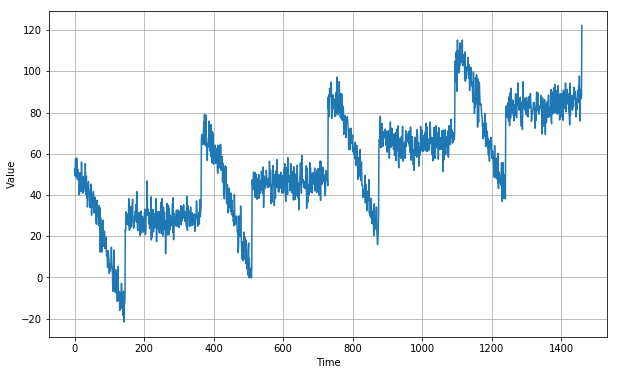

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

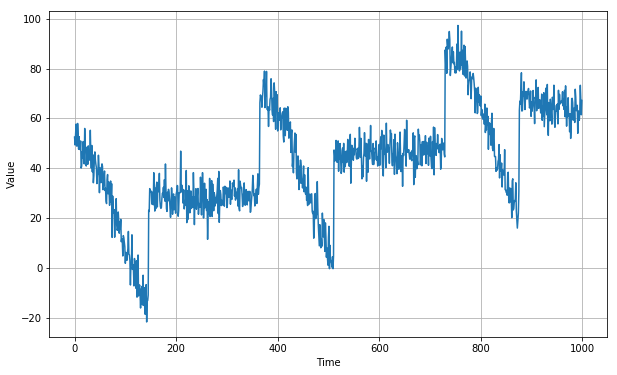

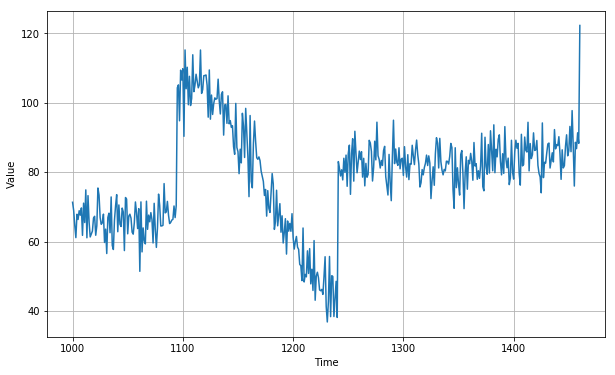

In [5]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

# Naive Forecast

In [6]:
naive_forecast = series[split_time -1:-1]

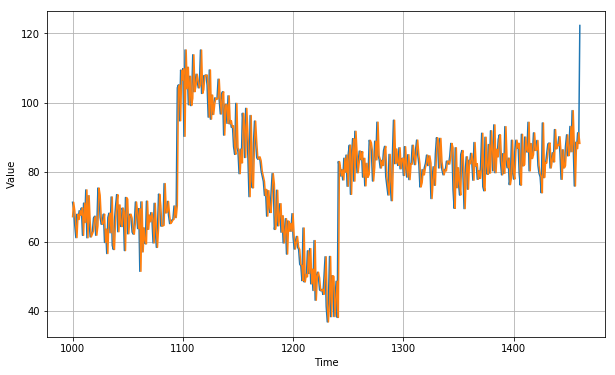

In [7]:
plt.figure(figsize = (10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

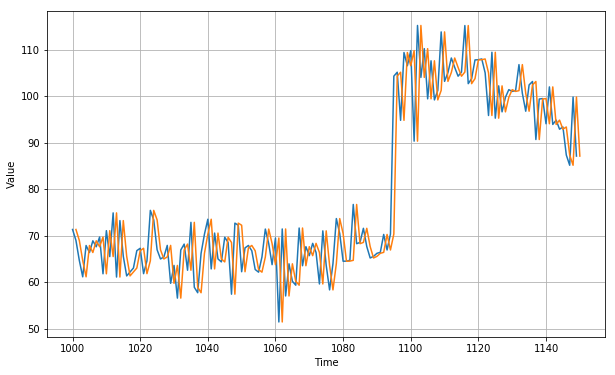

In [8]:
plt.figure(figsize = (10,6))
plot_series(time_valid, x_valid, start =0, end = 150)
plot_series(time_valid, naive_forecast, start =1, end = 151)

You can see that the naive forecast lags 1 step behind the time series.

Now let's compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period:

In [9]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827538
5.937908


that's our baseline, now let's try a moving average: 


In [10]:
def moving_average_forecast(series, window_size):
    """forecasts the mean of the last few values. If window_size = 1, then this is equivalent to naive forecase"""
    forecast = []
    for time in range(len(series)-window_size):
        forecast.append(series[time:time + window_size].mean())
        return np.array(forecast)

In [ ]:
moving_avg = moving_average_forecast(series, 30)[split_time-30:]

plt.figure(figsize = (10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)